#  Import Libraries

In [1]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_wine

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

#  Feature Selection

## 1. Filter Method

###  1.1 Correlation Method

In [3]:
df = pd.read_csv("Boston_HPP.csv")

In [4]:
df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,House_Price
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
df.columns

Index(['Unnamed: 0', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
       'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'House_Price'],
      dtype='object')

In [7]:
boston_df = df

In [9]:
boston_df = boston_df.drop("Unnamed: 0", axis = 1)

<Axes: >

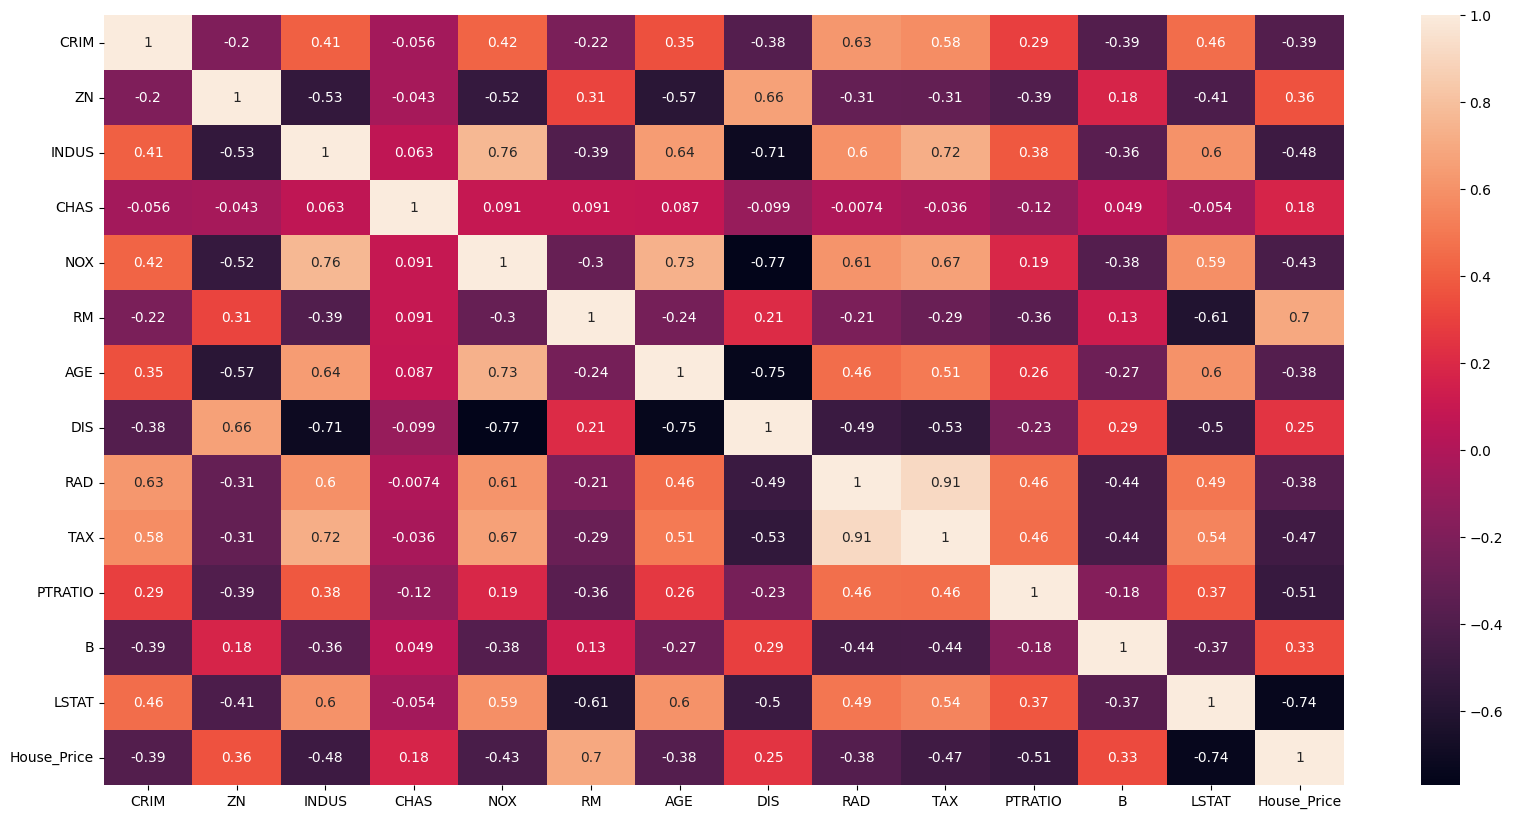

In [10]:
corr = boston_df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True)

In [ ]:
# We just need correlation of price with other columns only
# Default Method is Pearson 

#####  Pearson

<Axes: >

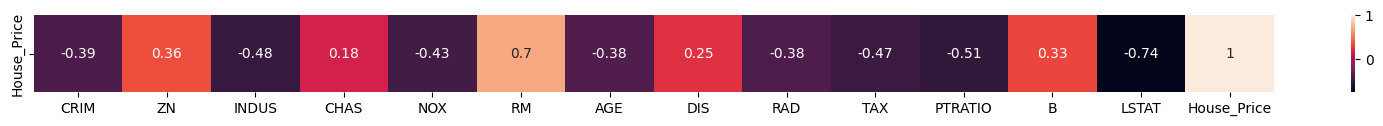

In [11]:
corr = boston_df.corr().tail(1)
plt.figure(figsize=(20,1))
sns.heatmap(corr, annot= True)

In [12]:
boston_df["CHAS"].value_counts()

CHAS
0.0    471
1.0     35
Name: count, dtype: int64

##### Spearman 

<Axes: >

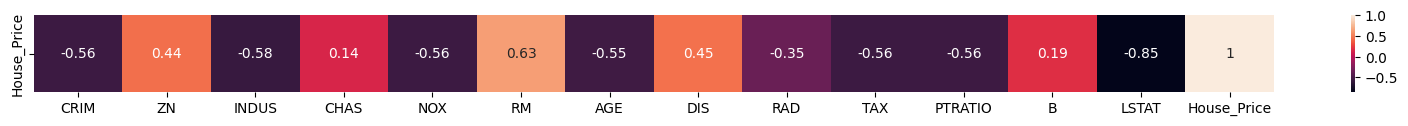

In [16]:
corr = boston_df.corr(method = "spearman").tail(1)
plt.figure(figsize = (20,1))
sns.heatmap(corr, annot= True)

<Axes: >

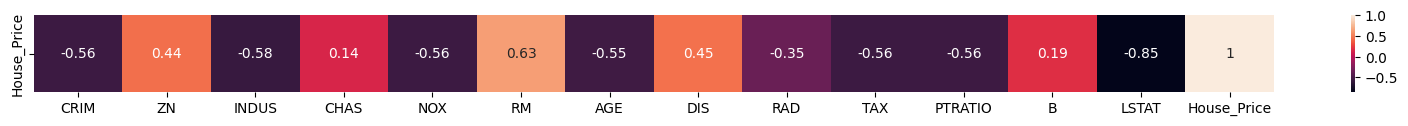

In [17]:
corr = boston_df.corr(method = "spearman").tail(1)
plt.figure(figsize = (20,1))
sns.heatmap(corr, annot= True)

#####  Kendall Method

In [13]:
corr2 = boston_df[["CHAS","House_Price"]].corr(method = "kendall").tail(1)

In [14]:
corr2

,CHAS,House_Price
House_Price,0.115202,1.0


<Axes: >

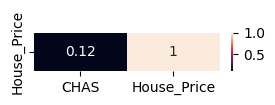

In [15]:
plt.figure(figsize = (3,0.5))
sns.heatmap(corr2, annot=True)

<Axes: >

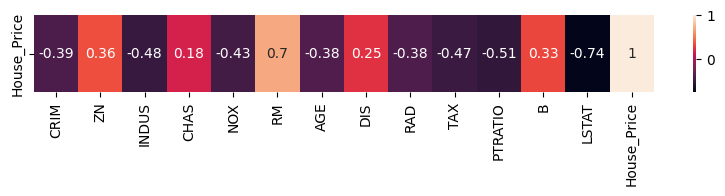

In [19]:
# ## Pearson Method
# corr = boston_df.corr(method="pearson").tail(1)
# plt.figure(figsize = (10,1))
# sns.heatmap(corr, annot = True)


# OR


## Pearson Method
corr = boston_df.corr().tail(1)
plt.figure(figsize = (10,1))
sns.heatmap(corr, annot = True)

<Axes: >

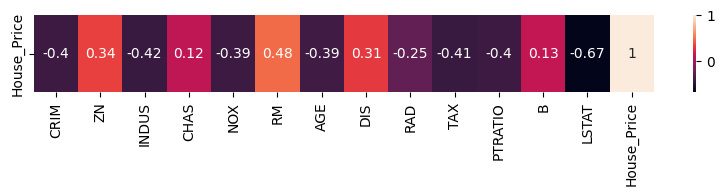

In [20]:
## Kendall Method
corr = boston_df.corr(method="kendall").tail(1)
plt.figure(figsize = (10,1))
sns.heatmap(corr, annot = True)

### 1.2 Fisher's Score

In [21]:
# pip install skfeature-chappers

In [22]:
from skfeature.function.similarity_based import fisher_score

In [24]:
data_dict_wine = load_wine()

In [26]:
wine_df = pd.DataFrame(data = data_dict_wine.data, columns = data_dict_wine.feature_names)

In [27]:
wine_df["target"] = data_dict_wine.target

In [29]:
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [30]:
wine_df["target"].value_counts()

target
1    71
0    59
2    48
Name: count, dtype: int64

In [31]:
x = wine_df.drop("target", axis = 1)
y = wine_df["target"]

In [38]:
fisher_rank = fisher_score.fisher_score(x.to_numpy(),y.to_numpy())

In [39]:
fisher_rank

array([ 6,  0,  1, 12,  3,  2,  7, 11,  9,  4,  5, 10,  8])

<Axes: >

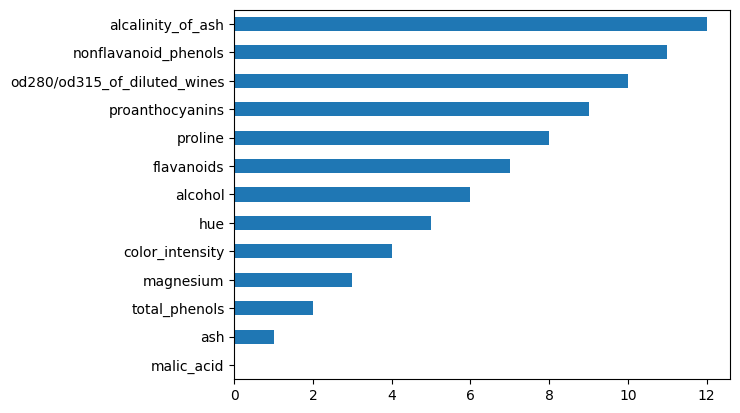

In [40]:
series_fisher_rank = pd.Series(fisher_rank, index = x.columns)
series_fisher_rank.sort_values().plot(kind = "barh")

In [41]:
x = boston_df.drop("House_Price",axis = 1)
y = boston_df["House_Price"]

<Axes: >

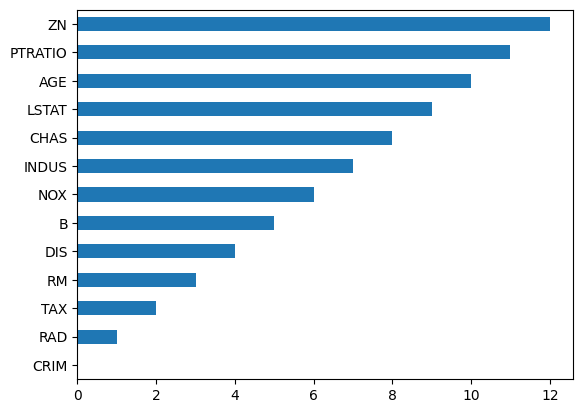

In [43]:
fisher_rank = fisher_score.fisher_score(x.to_numpy(),y.to_numpy())
series_fisher_rank = pd.Series(fisher_rank,index = x.columns)
series_fisher_rank.sort_values().plot(kind = "barh")

### 1.3 Variance Threshold Method 

In [44]:
boston_df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,House_Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


In [50]:
boston_df["TEST"] = 120

In [51]:
boston_df["TEST"].value_counts()

TEST
120    506
Name: count, dtype: int64

In [52]:
boston_df["TEST"].unique()

array([120])

In [53]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,House_Price,TEST
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.0
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806,120.0
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104,0.0
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000,120.0
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000,120.0
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000,120.0
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000,120.0
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000,120.0


In [54]:
from sklearn.feature_selection import VarianceThreshold

In [55]:
var_h = VarianceThreshold(threshold=0.0)

In [57]:
var_h.fit_transform(boston_df)
var_h.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False])